# A3 - ML Introduction 

## Phase 0

### Part 1

In [185]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [186]:
df.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


### Part 2

In [188]:
percent_missing = (df.isna().sum() * 100)/len(df)
percent_missing

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

## Phase 1 - Preprocessing

### Part 1

1. We can use mean of not nan values to fill the nan values which is not always good because it includes the outliers and makes the mean biased.

<br>

2. We can use mode of values for non-numeric columns like cast and country which we have in our dataset. this is considered a better solution because it's non-numeric and most probably the nan values where the mode than other values.

In [189]:
print(df.mode().iloc[0])
df.fillna(df.mode().iloc[0], inplace=True)

type                                   Movie
title                             60 Days In
cast                      David Attenborough
country                        United States
release_year                          2018.0
listed_in       Dramas, International Movies
description                                1
Name: 0, dtype: object


### Part 2

Normalization or Min-Max Scaling is used to transform features to be on a similar scale. The new point is calculated as:

$ X_{new} = (X - X_{min})/(X_{max} - X_{min}) $ 

This scales the range to [0, 1] or sometimes [-1, 1]. Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with them. Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.

Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

$ X_{new} = (X - mean)/Std $

Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

here we use normalization for realease year, because it's more suitable and it uses the min max values for scaling and we don't know about distribuation of numbers

In [190]:
from sklearn import preprocessing, feature_extraction, feature_selection

In [191]:
min_max_scaler = preprocessing.MinMaxScaler()
normal = df.copy(deep=True)
normal['release_year'] = min_max_scaler.fit_transform(pd.DataFrame(df['release_year']))

normal.head()

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,0.989583,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,1.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,1.000000,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Part 3

**Label Encoding or Ordinal Encoding** 


We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.  <br>
In Label encoding, each label is converted into an integer value. We will create a variable that contains the categories representing the education qualification of a person.

**One Hot Encoding**


We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

in here we use label encoding because it has a better representaion but there is no priority in numbers we map.

In [192]:
label_encoder = preprocessing.LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])

df.head()

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,David Attenborough,608,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,David Attenborough,608,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Part 4

We seperate genres in listed_in column into 3 columns named Genre1, Genre2, Genre3 and fill None values with ffill operation which takes the previous column as the value.

We also could use vectors, dictionaries for this purpos which doesn't sound logical.

In [193]:
df_splitted = df['listed_in'].str.split(',', expand=True)
df.insert(7, "Genre1", df_splitted[0])
df.insert(8, "Genre2", df_splitted[1])
df.insert(9, "Genre3", df_splitted[2])
df = df.ffill(axis=1)
df.drop(['listed_in'], axis=1, inplace=True)
df.head()

,type,title,cast,country,release_year,description,Genre1,Genre2,Genre3
0,Movie,Dick Johnson Is Dead,David Attenborough,608,2020,"As her father nears the end of his life, filmm...",Documentaries,Documentaries,Documentaries
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,"After crossing paths at a party, a Cape Town t...",International TV Shows,TV Dramas,TV Mysteries
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
3,TV Show,Jailbirds New Orleans,David Attenborough,608,2021,"Feuds, flirtations and toilet talk go down amo...",Docuseries,Reality TV,Reality TV
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,In a city of coaching centers known to train I...,International TV Shows,Romantic TV Shows,TV Comedies


### Extract feature from text

In [194]:
df["concatenated"] = df["title"] + " " + df["description"]
df.drop(labels = ["title", "description"], axis = 1, inplace = True)
df.head()

,type,cast,country,release_year,Genre1,Genre2,Genre3,concatenated
0,Movie,David Attenborough,608,2020,Documentaries,Documentaries,Documentaries,Dick Johnson Is Dead As her father nears the e...
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,International TV Shows,TV Dramas,TV Mysteries,"Blood & Water After crossing paths at a party,..."
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Ganglands To protect his family from a powerfu...
3,TV Show,David Attenborough,608,2021,Docuseries,Reality TV,Reality TV,"Jailbirds New Orleans Feuds, flirtations and t..."
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,International TV Shows,Romantic TV Shows,TV Comedies,Kota Factory In a city of coaching centers kno...


In [195]:
casts = [cast.replace(' ', '') for cast in df['cast']]
cast_vectorizer = feature_extraction.text.CountVectorizer(analyzer='word', max_features=10, stop_words='english')
cast_features = cast_vectorizer.fit_transform(casts)
print('features in cast are:', cast_vectorizer.get_feature_names())

features in cast are: ['anupamkher', 'davidattenborough', 'eun', 'hee', 'ho', 'hyun', 'jin', 'min', 'won', 'young']


In [196]:
col = pd.DataFrame(cast_features.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(casts))],
            columns=cast_vectorizer.get_feature_names())

for feature in col:
    df[feature] = list(col[feature])
df.head()

,type,cast,country,release_year,Genre1,Genre2,Genre3,concatenated,anupamkher,davidattenborough,eun,hee,ho,hyun,jin,min,won,young
0,Movie,David Attenborough,608,2020,Documentaries,Documentaries,Documentaries,Dick Johnson Is Dead As her father nears the e...,0,1,0,0,0,0,0,0,0,0
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,International TV Shows,TV Dramas,TV Mysteries,"Blood & Water After crossing paths at a party,...",0,0,0,0,0,0,0,0,0,0
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Ganglands To protect his family from a powerfu...,0,0,0,0,0,0,0,0,0,0
3,TV Show,David Attenborough,608,2021,Docuseries,Reality TV,Reality TV,"Jailbirds New Orleans Feuds, flirtations and t...",0,1,0,0,0,0,0,0,0,0
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,International TV Shows,Romantic TV Shows,TV Comedies,Kota Factory In a city of coaching centers kno...,0,0,0,0,0,0,0,0,0,0


In [197]:
desc_vectorizer = feature_extraction.text.CountVectorizer(analyzer='word', max_features=50, stop_words='english')
desc_features = desc_vectorizer.fit_transform(df['concatenated'])
print('features in concatenated are:', desc_vectorizer.get_feature_names())

features in concatenated are: ['adventures', 'best', 'boy', 'city', 'comedy', 'daughter', 'day', 'death', 'documentary', 'family', 'father', 'finds', 'friend', 'friends', 'girl', 'group', 'help', 'high', 'home', 'kids', 'life', 'little', 'lives', 'love', 'make', 'man', 'mother', 'murder', 'new', 'old', 'save', 'school', 'secret', 'series', 'son', 'special', 'stories', 'story', 'takes', 'team', 'time', 'town', 'true', 'war', 'way', 'woman', 'world', 'year', 'years', 'young']


In [198]:
col = pd.DataFrame(desc_features.toarray(), 
            index=['sentence1'+str(i) 
                   for i in range(1, 1+len(list(df['concatenated'])))],
            columns=desc_vectorizer.get_feature_names())

for feature in col:
    df[feature] = list(col[feature])
df.head()

,type,cast,country,release_year,Genre1,Genre2,Genre3,concatenated,anupamkher,davidattenborough,...,team,time,town,true,war,way,woman,world,year,years
0,Movie,David Attenborough,608,2020,Documentaries,Documentaries,Documentaries,Dick Johnson Is Dead As her father nears the e...,0,1,...,0,0,0,0,0,0,0,0,0,0
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,International TV Shows,TV Dramas,TV Mysteries,"Blood & Water After crossing paths at a party,...",0,0,...,0,0,1,0,0,0,0,0,0,0
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Ganglands To protect his family from a powerfu...,0,0,...,1,0,0,0,1,0,0,0,0,0
3,TV Show,David Attenborough,608,2021,Docuseries,Reality TV,Reality TV,"Jailbirds New Orleans Feuds, flirtations and t...",0,1,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,International TV Shows,Romantic TV Shows,TV Comedies,Kota Factory In a city of coaching centers kno...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
df.drop(labels = "cast", axis = 1, inplace = True)
df.drop(labels = "concatenated", axis = 1, inplace = True)

In [200]:
for column in df:
    if(df[column].dtype == "object"):
        df[column] = label_encoder.fit_transform(df[column])

df.head()

,type,country,release_year,Genre1,Genre2,Genre3,anupamkher,davidattenborough,eun,hee,...,team,time,town,true,war,way,woman,world,year,years
0,0,608,74,22,85,90,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,430,75,37,63,68,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,608,75,20,33,64,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,608,75,24,46,46,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,254,75,37,49,65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyzing the relation between features

<BarContainer object of 10 artists>

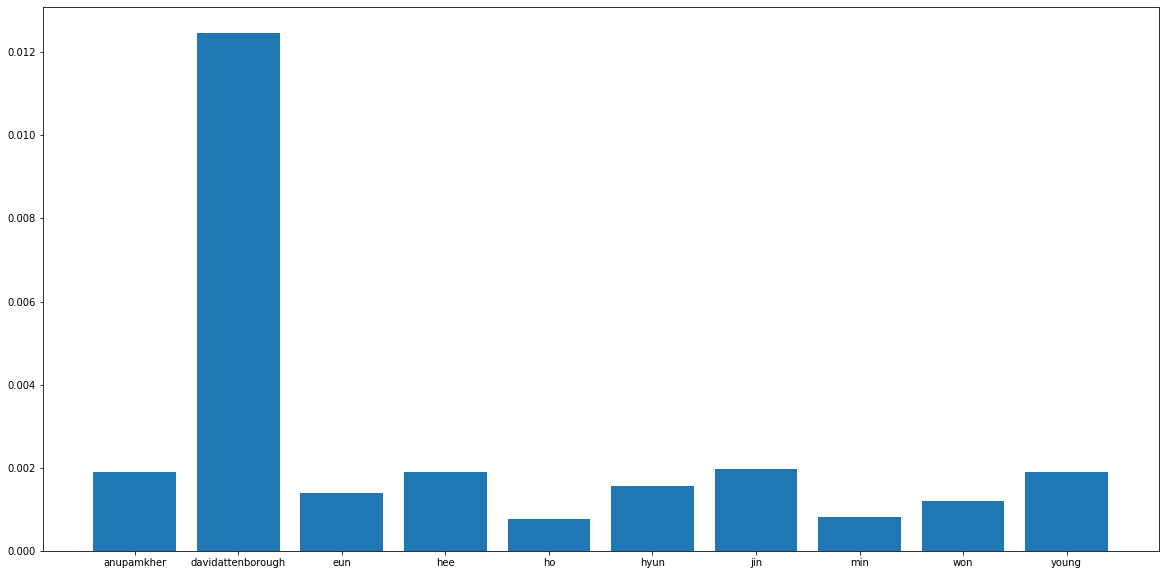

In [201]:
import matplotlib.pyplot as plt
cast = feature_selection.mutual_info_classif(X=cast_features, y=df['type'])

plt.figure(figsize=(20,10))
plt.bar(cast_vectorizer.get_feature_names(), cast)


<BarContainer object of 50 artists>

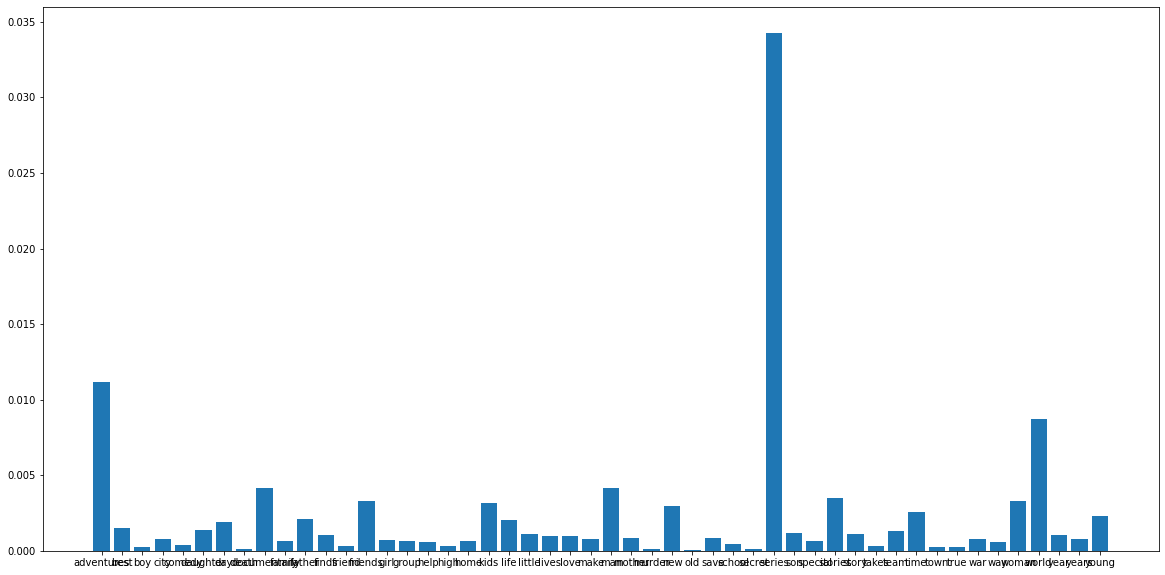

In [202]:
desc = feature_selection.mutual_info_classif(X=desc_features, y=df['type'])

plt.figure(figsize=(20,10))
plt.bar(desc_vectorizer.get_feature_names(), desc)

here we see that Genre1 & Genre2 & Genre3 have the most information gain among others.

<BarContainer object of 64 artists>

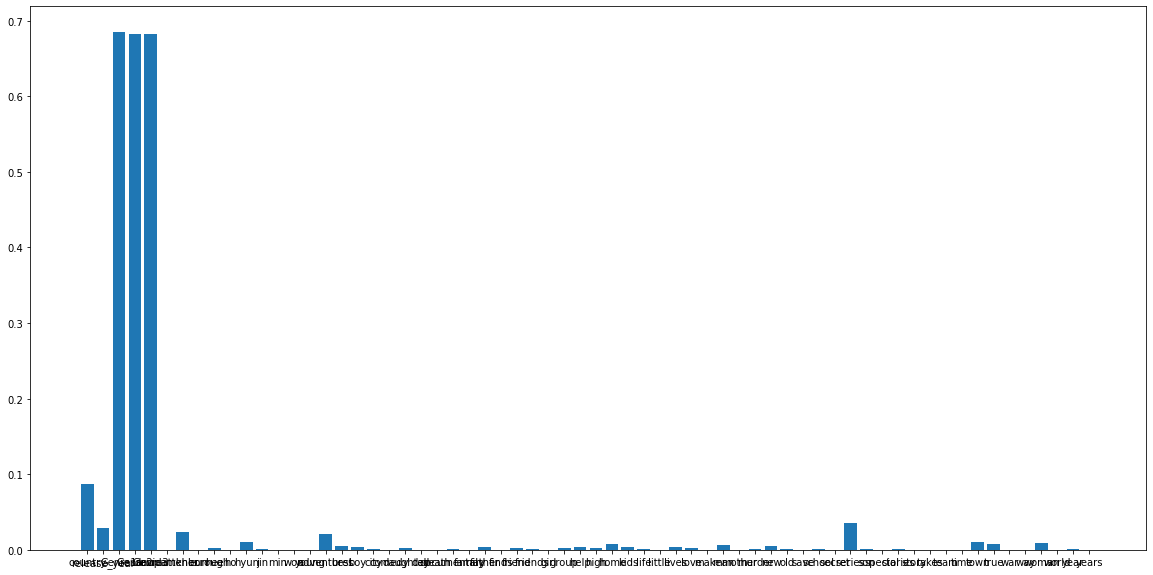

In [282]:
remainingColumns = list(df.columns)
remainingColumns.remove("type")
informationGain = feature_selection.mutual_info_classif(X = df[remainingColumns], y = df['type'])
plt.figure(figsize  = (20, 10))
plt.bar(remainingColumns, informationGain)

## Phase 2

In [205]:
df.loc[:, 'country':]

,country,release_year,Genre1,Genre2,Genre3,anupamkher,davidattenborough,eun,hee,ho,...,team,time,town,true,war,way,woman,world,year,years
0,608,74,22,85,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,430,75,37,63,68,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,608,75,20,33,64,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,608,75,24,46,46,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,254,75,37,49,65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,608,54,2,2,30,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
11055,608,50,18,13,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,608,68,2,12,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11057,59,70,2,12,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sn

In [208]:
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, 'country':], df['type'], test_size=0.20, random_state=42)

,country,release_year,Genre1,Genre2,Genre3,anupamkher,davidattenborough,eun,hee,ho,...,team,time,town,true,war,way,woman,world,year,years
8675,608,69,26,89,94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3429,608,73,69,122,127,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
821,511,72,26,48,73,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2063,608,74,39,98,103,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2272,254,69,26,32,73,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,608,70,42,100,105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,608,64,37,63,66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,423,68,20,33,66,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
860,16,74,22,32,34,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
X_train.iloc[:, 0:5]

,country,release_year,Genre1,Genre2,Genre3
8675,608,69,26,89,94
3429,608,73,69,122,127
821,511,72,26,48,73
2063,608,74,39,98,103
2272,254,69,26,32,73
...,...,...,...,...,...
5734,608,70,42,100,105
5191,608,64,37,63,66
5390,423,68,20,33,66
860,16,74,22,32,34


**max_depth**


The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split**


The minimum number of samples required to split an internal node:

In [303]:
clf_model = DecisionTreeClassifier(criterion='entropy',max_depth=13, min_samples_leaf=2, min_samples_split = 4)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9958904109589041

[Text(163.6266393442623, 208.38, 'X[3] <= 32.5\nentropy = 0.992\nsamples = 7409\nvalue = [4098, 3311]'),
 Text(79.58360655737705, 190.26, 'X[3] <= 19.5\nentropy = 0.736\nsamples = 3218\nvalue = [2552, 666]'),
 Text(38.41967213114754, 172.14, 'X[3] <= 16.5\nentropy = 0.99\nsamples = 973\nvalue = [428, 545]'),
 Text(32.93114754098361, 154.01999999999998, 'X[3] <= 3.5\nentropy = 0.95\nsamples = 678\nvalue = [428, 250]'),
 Text(27.442622950819672, 135.89999999999998, 'entropy = 0.0\nsamples = 118\nvalue = [0, 118]'),
 Text(38.41967213114754, 135.89999999999998, 'X[3] <= 11.5\nentropy = 0.788\nsamples = 560\nvalue = [428, 132]'),
 Text(27.442622950819672, 117.77999999999999, 'X[3] <= 9.5\nentropy = 0.271\nsamples = 388\nvalue = [370, 18]'),
 Text(21.95409836065574, 99.66, 'X[2] <= 1.5\nentropy = 0.828\nsamples = 69\nvalue = [51, 18]'),
 Text(10.97704918032787, 81.53999999999999, 'X[2] <= 0.5\nentropy = 0.146\nsamples = 48\nvalue = [47, 1]'),
 Text(5.488524590163935, 63.41999999999999, 'entr

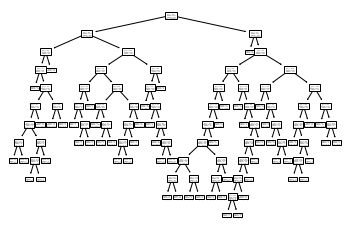

In [225]:
from sklearn import tree
tree.plot_tree(clf_model)

<AxesSubplot:>

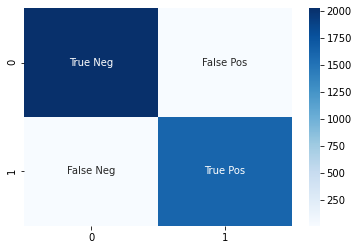

In [305]:
import numpy as np
cf_matrix = confusion_matrix(y_test, y_predict)
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

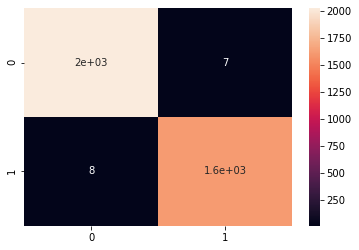

In [306]:
sns.heatmap(cf_matrix, annot=True)

In [224]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 15),
    'min_samples_split': range(1, 6),
    'min_samples_leaf': range(1, 5)
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid= param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


/home/adib/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adib/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adib/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/home/adib/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/adib/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fi

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

**Q1)**

we splitted the df into 80-20 train-test ratio. cause it has a good balance of both test and train.

if we do the same for 98% train and the rest test the result would be higher because of overfit. it wouldn't do well on test dataset.

if we do the same for 40% train the result would be underfit and it also doesn't do well on test dataset.

**Q2)**

high max-depth will result to overfit and time consuming process.
low max-depth will result to underfit.

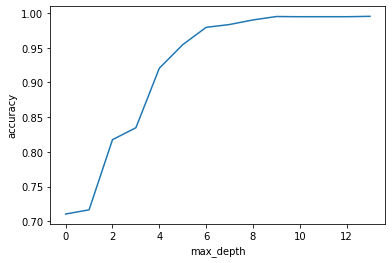

In [237]:
scores = []
for max_depth in range(1, 15):
    clf_model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth, min_samples_leaf=1, min_samples_split = 9)   
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    scores.append(accuracy_score(y_test,y_predict))

plt.plot(scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

## Phase 3

Text(0, 0.5, 'accuracy')

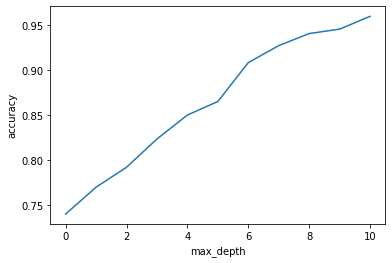

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

scores = []

for max_depth in range(1, 12):
    clf=RandomForestClassifier(max_depth=max_depth, min_samples_leaf=1, min_samples_split=2)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [274]:
feature_imp = pd.Series(clf.feature_importances_,index=df.columns[1:]).sort_values(ascending=False)
feature_imp

Genre1        0.253744
Genre2        0.248039
Genre3        0.217387
country       0.075191
series        0.049450
                ...   
min           0.000270
eun           0.000266
anupamkher    0.000170
won           0.000157
ho            0.000076
Length: 64, dtype: float64

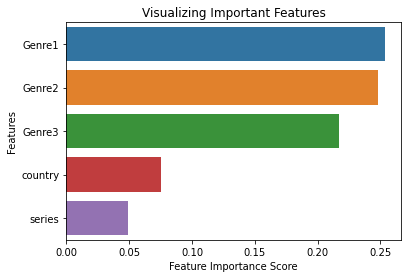

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<BarContainer object of 64 artists>

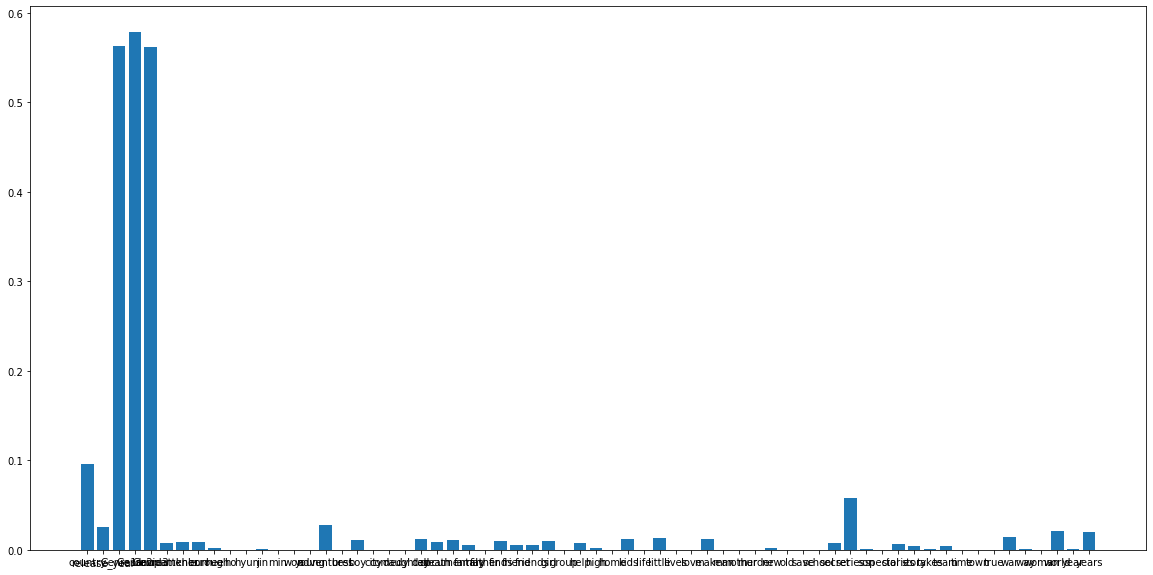

In [294]:
cast = feature_selection.mutual_info_classif(X=X_test, y=y_pred)

plt.figure(figsize=(20,10))
plt.bar(X_test.columns, cast)

**Question**

For lower variance achievement, the decision tree would be better as it generates only one tree which has lower than a forest that generates multiple trees to pick one.

for lower bias achievement, Random forest will perform better than single decision tree as it picks one with the least bias rather than decision tree.